In [1]:
import numpy as np
from matplotlib import pyplot as plt
import importlib

import build.steps as steps

In [4]:
dir(steps)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'calc_acceleration',
 'calc_diff',
 'get_mass_matrix',
 'gravity_force',
 'gravity_potential',
 'integration_step',
 'kinetic_energy',
 'simulate',
 'zero_momentum_frame']

In [25]:
def total_energy_over_time(rs, vs, mass):
    mass_matrix = steps.get_mass_matrix(mass)
    energies = []
    for r, v in zip(rs, vs):
        W = (np.sum(steps.gravity_potential(r, mass_matrix))/2 +
            np.sum(steps.kinetic_energy(v, mass)))
        energies.append(W)
    return np.array(energies)

In [38]:
def plot_energy_evolution(rs, vs, ts):
    plt.title("Energy evolution")
    plt.xlabel("Time");plt.ylabel("Energy")
    plt.plot(ts, total_energy_over_time(rs, vs, mass))

## Circular orbit

In [8]:
iteration_time = 0.5
record_interval = 0.002
dt = 0.000005

In [172]:
def gravity_potential(r, mass):
    mass_matrix = steps.get_mass_matrix(mass)
    diff = steps.calc_diff(r)
    dist = np.sqrt(np.sum(diff**2, axis=0))
    W = mass_matrix/dist
    np.fill_diagonal(W, 0)
    return np.sum(W)/2

In [9]:
%%time
# circular
mass = np.array([100., 1]);
r0 = np.array([
    [0,1],
    [0,0],
    [0,0]]);
v0 =np.array([
    [0.,0],
    [0,10],
    [0,0]]);
res = steps.simulate(r0, v0, 0, mass, 0.6, dt, record_interval, True, True)
rs, vs, ts1 = [np.array(x) for x in res]
xs1 = rs[:, 0]
ys1 = rs[:, 1]

99.67%   [ #########################  ]Wall time: 564 ms


In [10]:
%%time
# small parabol
mass = np.array([100., 1]);
r0 = np.array([
    [0,1],
    [0,0],
    [0,0]]);
v0 =np.array([
    [0.,0],
    [0,6],
    [0,0]]);
res = steps.simulate(r0, v0, 0, mass, 0.25, dt, record_interval, True, True)
rs, vs, ts2 = [np.array(x) for x in res]
xs2 = rs[:, 0]
ys2 = rs[:, 1]

99.20%   [ #########################  ]Wall time: 241 ms


In [14]:
%%time
# big parabol
mass = np.array([100., 1]);
r0 = np.array([
    [0,1],
    [0,0],
    [0,0]]);
v0 =np.array([
    [0.,0],
    [0,12],
    [0,0]]);
res = steps.simulate(r0, v0, 0, mass, 1.4, dt, record_interval, True, True)
rs, vs, ts3 = [np.array(x) for x in res]
xs3 = rs[:, 0]
ys3 = rs[:, 1]

99.29%   [ #########################  ]Wall time: 1e+03 ms


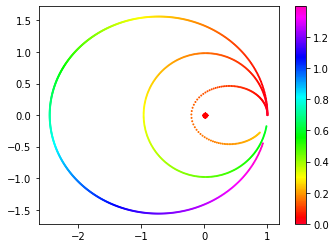

In [12]:
plt.set_cmap("gist_rainbow")
norm = plt.Normalize(0, np.max(np.concatenate([ts1, ts2, ts3])))
plt.scatter(xs1[:, 0], ys1[:, 0], s=5,c="red");
plt.scatter(xs1[:, 1], ys1[:, 1], s=1,c=ts1, norm=norm);
plt.scatter(xs2[:, 1], ys2[:, 1], s=1,c=ts2, norm=norm);
plt.scatter(xs3[:, 1], ys3[:, 1], s=1,c=ts3, norm=norm);
plt.colorbar()
plt.gca().set_aspect("equal")

## Two body

In [29]:
iteration_time = 37
record_interval = 0.01
dt = 0.000005

99.89%   [ #########################  ]Wall time: 24.2 s


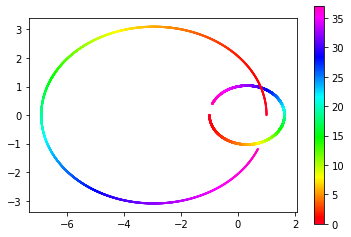

In [30]:
%%time
# big parabol
mass = np.array([3, 1]);
r0 = np.array([
    [-1,1],
    [0,0],
    [0,0]]);
v0 =np.array([
    [0.,0],
    [-1,1],
    [0,0]])*0.9;
res = steps.simulate(r0, v0, 0, mass, iteration_time, dt, record_interval, True, True)
rs, vs, ts = [np.array(x) for x in res]
xs = rs[:, 0]
ys = rs[:, 1]

plt.set_cmap("gist_rainbow")
norm = plt.Normalize(0, iteration_time)
plt.scatter(xs[:, 0], ys[:, 0], s=2,c=ts, norm=norm);
plt.scatter(xs[:, 1], ys[:, 1], s=1,c=ts, norm=norm);
plt.colorbar()
plt.gca().set_aspect("equal")

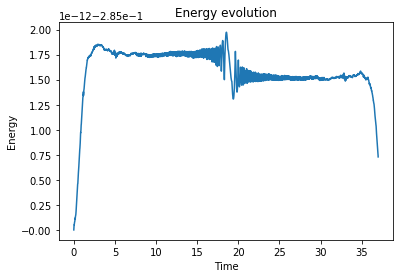

In [34]:
plot_energy_evolution(*res)

## Three body

99.87%   [ #########################  ]

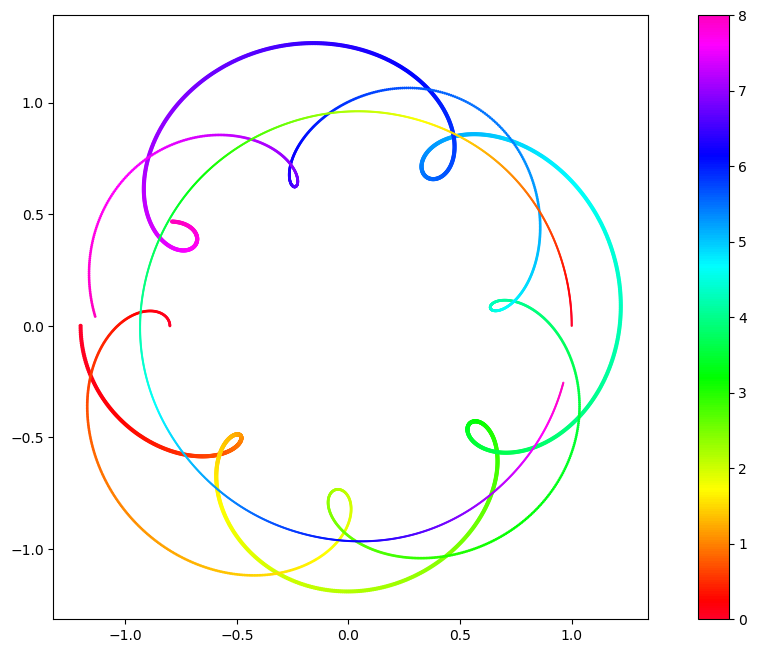

In [41]:
iteration_time = 8
record_interval = 0.005
dt = 0.000005

# big parabol
mass = np.array([1, 1, 2]);
r0 = np.array([
    [-1-0.2, -1+0.2, 1],
    [ 0, 0, 0],
    [ 0, 0, 0]]);
v0 =np.array([
    [ 0, 0, 0],
    [ -1.25-0.7, +1.25-0.7, +0.7],
    [ 0, 0, 0]]);
res = steps.simulate(r0, v0, 0, mass, iteration_time, dt, record_interval, True, True)
rs, vs, ts = [np.array(x) for x in res]
xs = rs[:, 0]
ys = rs[:, 1]

plt.figure(figsize=(13,8), dpi=100)
plt.set_cmap("gist_rainbow")
norm = plt.Normalize(0, iteration_time)

plt.scatter(xs[:, 0], ys[:, 0], s=4,c=ts, norm=norm);
plt.scatter(xs[:, 1], ys[:, 1], s=1,c=ts, norm=norm);
plt.scatter(xs[:, 2], ys[:, 2], s=0.25,c=ts, norm=norm);

plt.colorbar()
plt.gca().set_aspect("equal")

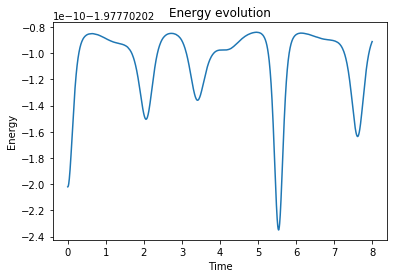

In [44]:
plot_energy_evolution(*res)

#### another one

99.87%   [ #########################  ]

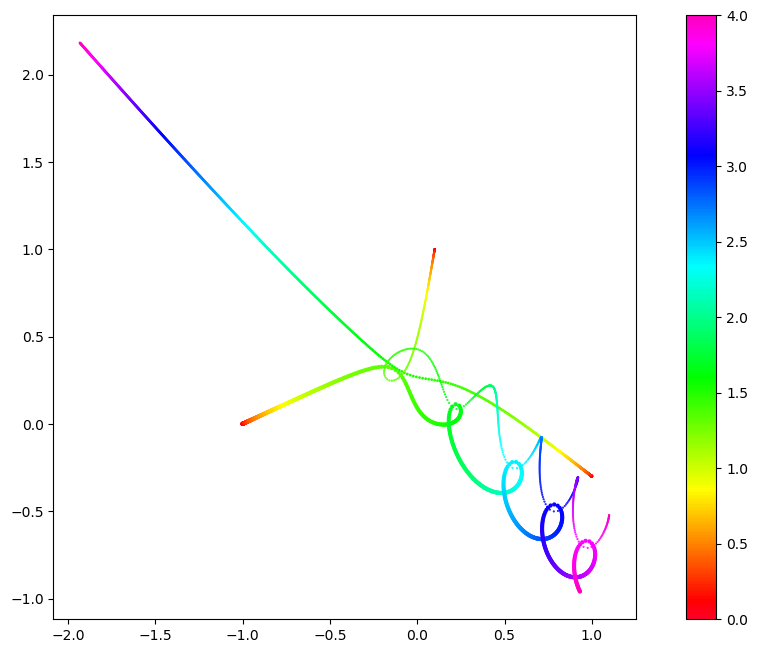

In [45]:
iteration_time = 4
record_interval = 0.005
dt = 0.000005

# big parabol
mass = np.array([1, 1, 1]);
r0 = np.array([
    [-1, 1, 0.1],
    [ 0, -0.3, 1],
    [ 0, 0, 0]]);
v0 =np.array([
    [ 0, 0, 0],
    [ 0,0,0],
    [ 0, 0, 0]]);
res = steps.simulate(r0, v0, 0, mass, iteration_time, dt, record_interval, True, True)
rs, vs, ts = [np.array(x) for x in res]
xs = rs[:, 0]
ys = rs[:, 1]

plt.figure(figsize=(13,8), dpi=100)
plt.set_cmap("gist_rainbow")
norm = plt.Normalize(0, iteration_time)

plt.scatter(xs[:, 0], ys[:, 0], s=4,c=ts, norm=norm);
plt.scatter(xs[:, 1], ys[:, 1], s=1,c=ts, norm=norm);
plt.scatter(xs[:, 2], ys[:, 2], s=0.25,c=ts, norm=norm);

plt.colorbar()
plt.gca().set_aspect("equal")

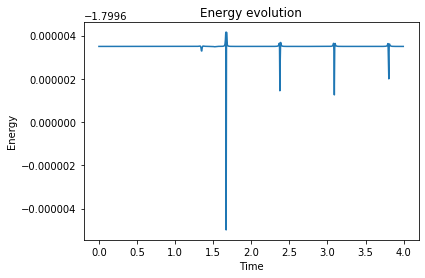

In [46]:
plot_energy_evolution(*res)